In [1]:
import numpy as np
import pandas as pd
import time

In [2]:
df = pd.read_csv('./Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df = df[['Age', 'EstimatedSalary', 'Purchased']]

In [4]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [11]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [12]:
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled.shape

(400, 2)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

In [16]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [30]:
model = Sequential()
model.add(Dense(10,activation='relu',input_shape=(2,)))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 151 (604.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_scaled,y,epochs=50, batch_size=1, verbose=1,validation_split=0.2)

Epoch 1/50
320/320 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8822 - loss: 0.2381 - val_accuracy: 0.9750 - val_loss: 0.2250
Epoch 2/50
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8865 - loss: 0.2365 - val_accuracy: 0.9750 - val_loss: 0.2442
Epoch 3/50
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8728 - loss: 0.2624 - val_accuracy: 0.9750 - val_loss: 0.2401
Epoch 4/50
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8649 - loss: 0.2760 - val_accuracy: 0.9750 - val_loss: 0.2343
Epoch 5/50
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9002 - loss: 0.2159 - val_accuracy: 0.9750 - val_loss: 0.2281
Epoch 6/50
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9105 - loss: 0.2093 - val_accuracy: 0.9750 - val_loss: 0.2500
Epoch 7/50
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8873 - loss: 0.2300 - val_accuracy: 0.9750 - val_loss: 0.2463
Epoch 8/50
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9006 - loss: 0.2299 - val_accuracy: 0.

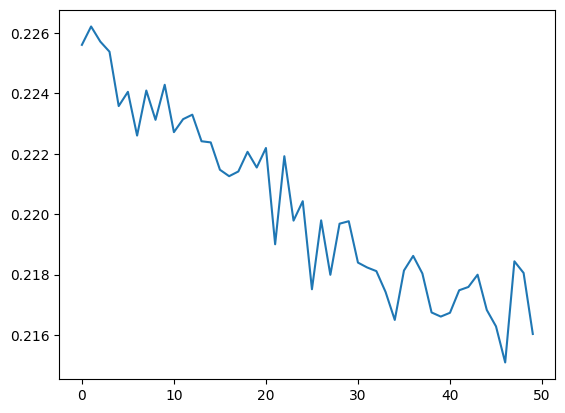

In [33]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])

In [34]:
st_model = Sequential()
st_model.add(Dense(10,activation='relu',input_shape=(2,)))
st_model.add(Dense(10,activation='relu'))
st_model.add(Dense(1,activation='sigmoid'))
st_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history=model.fit(X_scaled,y,epochs=50, batch_size=300, verbose=1,validation_split=0.2)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 198ms/step - accuracy: 0.9085 - loss: 0.2102 - val_accuracy: 0.9750 - val_loss: 0.2412
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9085 - loss: 0.2108 - val_accuracy: 0.9750 - val_loss: 0.2420
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.9085 - loss: 0.2103 - val_accuracy: 0.9750 - val_loss: 0.2425
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9096 - loss: 0.2097 - val_accuracy: 0.9750 - val_loss: 0.2429
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9096 - loss: 0.2087 - val_accuracy: 0.9750 - val_loss: 0.2431
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9074 - loss: 0.2136 - val_accuracy: 0.9750 - val_loss: 0.2432
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.9107 - loss: 0.2084 - val_accuracy: 0.9750 - val_loss: 0.2433
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9096 - loss: 0.2111 - val_accuracy: 0.9750 - val_loss: 0.243

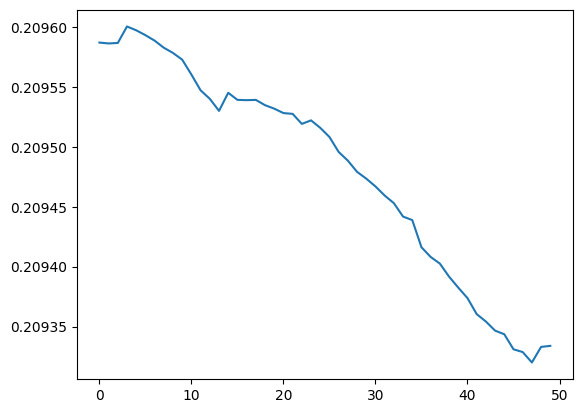

In [35]:

plt.plot(history.history['loss'])
plt.show()